# A demo to annotate an HCC dataset(Lu2022) by LiverCT

Yuhan Fan, 2023/08/13


In [1]:
import os
import gdown
import shutil
import warnings
warnings.filterwarnings("ignore")

from liverct_annot import *

INFO:pytorch_lightning.utilities.seed:Global seed set to 0
 captum (see https://github.com/pytorch/captum).


### download trained models from zenodo

In [4]:
url = "https://zenodo.org/record/8239570/files/models.zip"
output_folder = "../test_folder/"
os.makedirs(output_folder) 
gdown.download(url, output_folder + "LiverCT_models.zip", quiet=False)

extract_dir = "../test_folder/LiverCT_models/"
shutil.unpack_archive(output_folder + "LiverCT_models.zip", extract_dir=extract_dir)
os.remove(output_folder + "LiverCT_models.zip")

### download query dataset

In [5]:
url = "https://zenodo.org/record/8239570/files/example_data_Lu2022_downsampled.h5ad"
gdown.download(url, output_folder + "example_data_Lu2022_downsampled.h5ad", quiet=False)

Downloading...
From: https://zenodo.org/record/8239570/files/example_data_Lu2022_downsampled.h5ad
To: /home/wyh/liver_atlas/code/test_folder/example_data_Lu2022_downsampled.h5ad
100%|██████████| 245M/245M [14:59<00:00, 272kB/s] 


'../test_folder/example_data_Lu2022_downsampled.h5ad'

In [6]:
adata = sc.read_h5ad(output_folder + "example_data_Lu2022_downsampled.h5ad")
adata

AnnData object with n_obs × n_vars = 10000 × 43878
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Cell_ID', 'Sample_ID', 'Original_name_global', 'Original_name_sub', 'State', 'Patient_ID', 'Sample_status', 'Sample_status_original', 'Seq_tech', 'GEO_accession', 'Source', 'Gender', 'Age', 'Disease', 'Fibrotic_status', 'Author', 'Virus_infection', 'TNM', 'batch'
    var: 'features'

### Annotate cell types and intermediate/deviated states

In [7]:
res, latent = cell_states_annot(model_dir=extract_dir + "models/",
                                adata_test=adata, finetune_epoch=20)
res

INFO     Using data from adata.layers["counts"]                                              


INFO:scvi.data._anndata:Using data from adata.layers["counts"]


INFO     Registered keys:['X', 'batch_indices', 'labels']                                    


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'labels']


INFO     Successfully registered anndata object containing 10000 cells, 2000 vars, 22        
         batches, 9 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 0 extra continuous covariates.                                                  


INFO:scvi.data._anndata:Successfully registered anndata object containing 10000 cells, 2000 vars, 22 batches, 9 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.


INFO     Training for 20 epochs.                                                             


INFO:scvi.model._scanvi:Training for 20 epochs.
INFO:pytorch_lightning.utilities.distributed:GPU available: True, used: True
INFO:pytorch_lightning.utilities.distributed:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.accelerators.gpu:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Epoch 20/20: 100%|██████████| 20/20 [00:22<00:00,  1.11s/it, loss=1.2e+03, v_num=1] 
2023-08-14 15:32:46.203922 Test set feature selection start
Normalization has been escaped.
2023-08-14 15:32:46.203995 Test set lv1 predict start...
2023-08-14 15:32:47.002077 Test set lv2 predict start...
2023-08-14 15:32:47.013253 B cell lv2 predict...
B cell predict is finished in 0.020261
2023-08-14 15:32:47.033836 Cholangiocyte lv2 predict...
Cholangiocyte predict is finished in 0.02124
2023-08-14 15:32:47.055368 Endothelial cell lv2 predict...
Endothelial cell predict is finished in 0.128875
2023-08-14 15:32:47.184546 Hepatocyte lv2 predict...
Hepatocyte predict is finished in 0.01835
2023-08-14 15:32:47.203668 Mesenchymal cell lv2 predict...
Mesenchymal cell predict is finished in 0.103612
2023-08-14 15:32:47.307507 Myeloid cell lv2 predict...
Myeloid cell predict is finished in 0.328504
2023-08-14 15:32:47.636372 Plasma B cell lv2 predict...
Plasma B cell predict is finished in 0.009786
2023-08

,pred_lineage,pred_lv1,pred_lv2,intermediate_score,deviated_score,intermediate_state,deviated_state,proba_lv1,voting_lv2_1,voting_lv2_2
HCC08T_GCCTCTATCCAATGGT,Lymphoid,TNK cell,CD4,0.687614,1.000000,intermediate,deviated,0.980395,CD4,CD8
HCC08N_ACATCAGGTAGCAAAT,Lymphoid,TNK cell,NK,0.535148,-0.030936,intermediate,non-deviated,0.994560,NK,CD8
HCC09T_ACCTTTACAATAGCAA,Lymphoid,TNK cell,CD4,0.646208,-0.404868,intermediate,non-deviated,0.997496,CD4,CD8
HCC01T_CCACCTATCCTCTAGC,Myeloid,Myeloid cell,Macro,0.363837,-0.460342,intermediate,non-deviated,0.919317,Macro,Mono
HCC07T_CGAGCACCAGACGCCT,Myeloid,Myeloid cell,Macro,0.835844,0.745284,intermediate,deviated,0.965827,Macro,Mono
...,...,...,...,...,...,...,...,...,...,...
HCC03N_CCTAGCTGTGTAACGG,Endothelial,Endothelial cell,LSEC,0.543299,-0.747177,intermediate,non-deviated,0.992984,LSEC,VEC
HCC04N_ACACCCTGTCGAATCT,Lymphoid,Plasma B cell,Plasma,0.000000,-1.000000,non-intermediate,non-deviated,0.975014,Plasma,Unclassified
HCC08T_GAAGCAGCAATCCGAT,Lymphoid,TNK cell,CD4,0.848352,0.668326,intermediate,deviated,0.962216,CD4,CD8
HCC01T_AGCCTAAGTCTGCGGT,Lymphoid,TNK cell,CD8,0.349967,1.000000,intermediate,deviated,0.652724,CD8,CD4


### Annotate hepatocyte zonation groups

In [8]:
# select cells labeled as Hepatocyte
hep = adata[res['voting_lv2_1'] == "Hepatocyte"]
# "donor_ID" here is the keyword used as _scvi_batch; if not provided, all cells are treated as one batch
hep.obs['donor_ID'] = list(hep.obs['Patient_ID'])
hep_res, hep_latent = hep_zonation_annot(model_dir=extract_dir + "models/",
                                         hepatocyte_adata=hep, finetune_epoch=20)
hep_res

INFO     Using data from adata.layers["counts"]                                              


INFO:scvi.data._anndata:Using data from adata.layers["counts"]


INFO     Registered keys:['X', 'batch_indices', 'labels']                                    


INFO:scvi.data._anndata:Registered keys:['X', 'batch_indices', 'labels']


INFO     Successfully registered anndata object containing 1638 cells, 2000 vars, 209        
         batches, 2 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 0 extra continuous covariates.                                                  


INFO:scvi.data._anndata:Successfully registered anndata object containing 1638 cells, 2000 vars, 209 batches, 2 labels, and 0 proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.


INFO     Training for 20 epochs.                                                             


INFO:scvi.model._scanvi:Training for 20 epochs.
INFO:pytorch_lightning.utilities.distributed:GPU available: True, used: True
INFO:pytorch_lightning.utilities.distributed:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.accelerators.gpu:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Epoch 20/20: 100%|██████████| 20/20 [00:03<00:00,  5.55it/s, loss=2.57e+03, v_num=1]


HCC02T_CAAGATCCACATTTCT       c
HCC03T_AGCAGCCCACACCGCA       m
HCC04T_CCGGTAGCATTTCAGG       c
HCC03N_GAATGAAGTTATTCTC    pp+p
HCC04N_CGATTGATCTGGCGTG       c
                           ... 
HCC10L_CGTGAGCCATGCCACG    pp+p
HCC04T_TTAGGACTCCTAGGGC       c
HCC06T_CGTCCATGTTCTGTTT       c
HCC02T_GAAGCAGGTACTTAGC       m
HCC04T_CATCCACCAGGCTCAC       c
Name: zonation_pred, Length: 1638, dtype: object

### Visualize query data

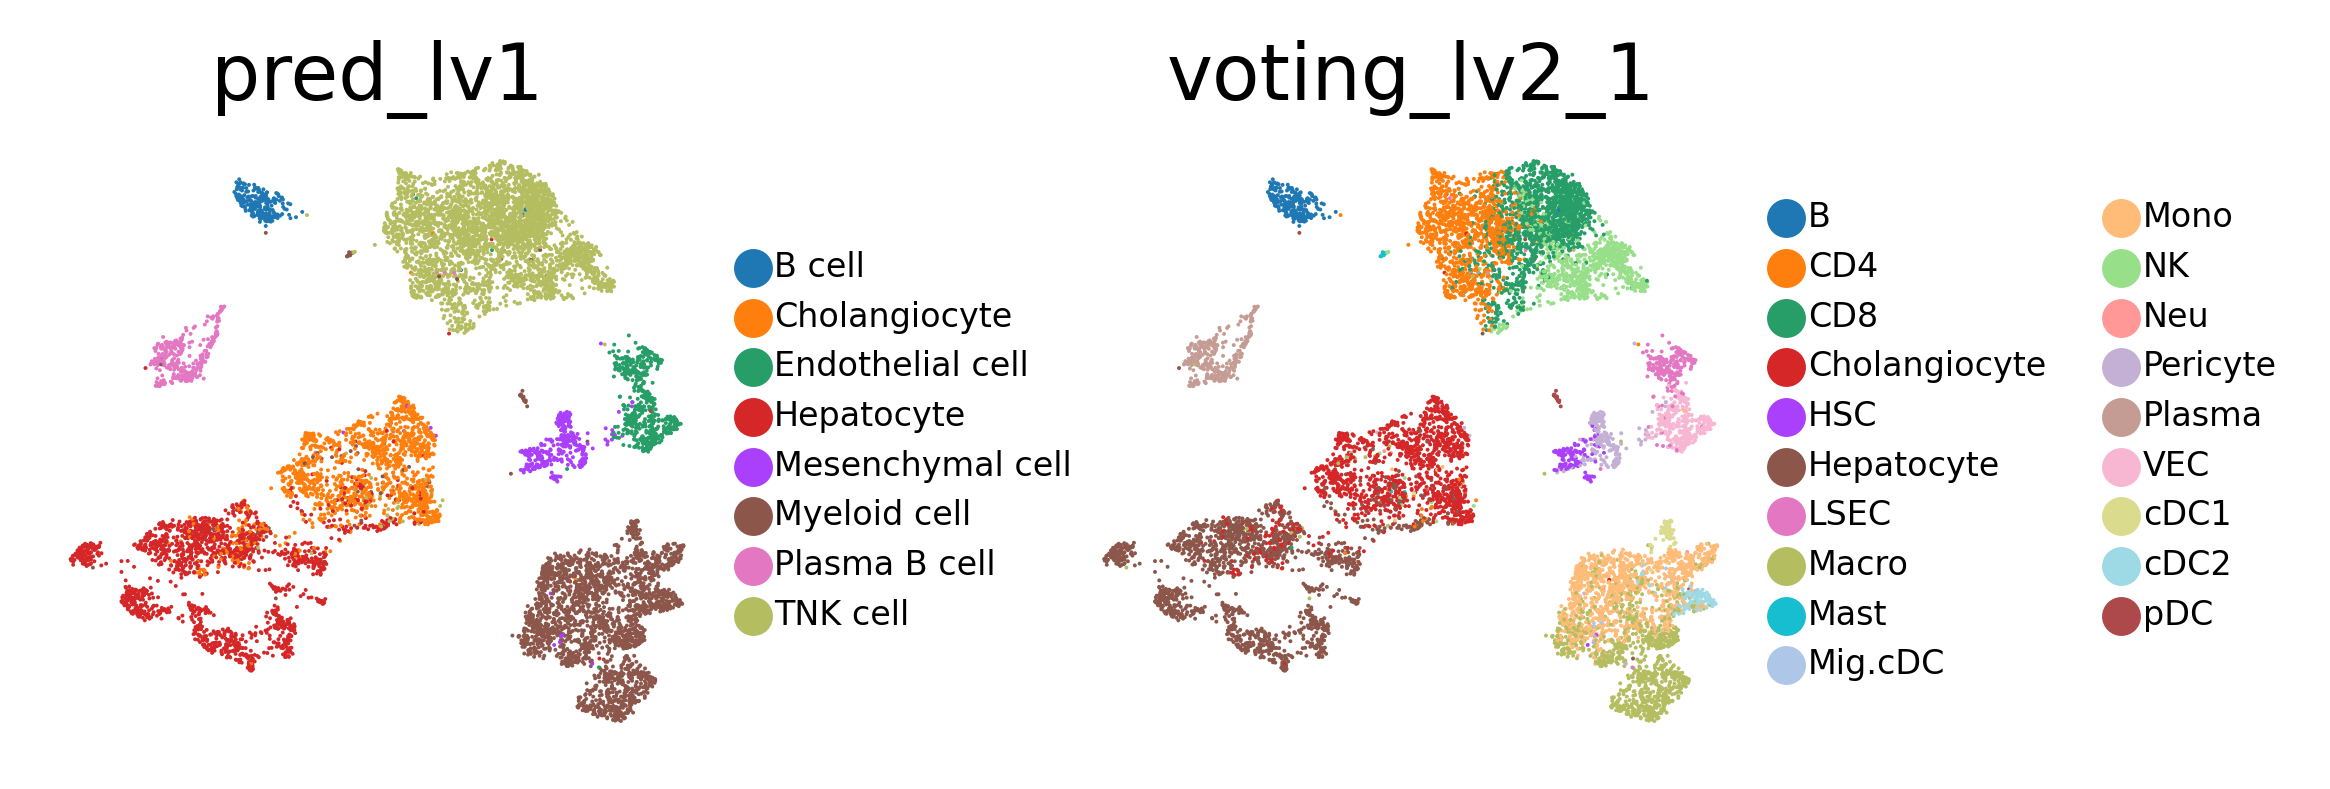

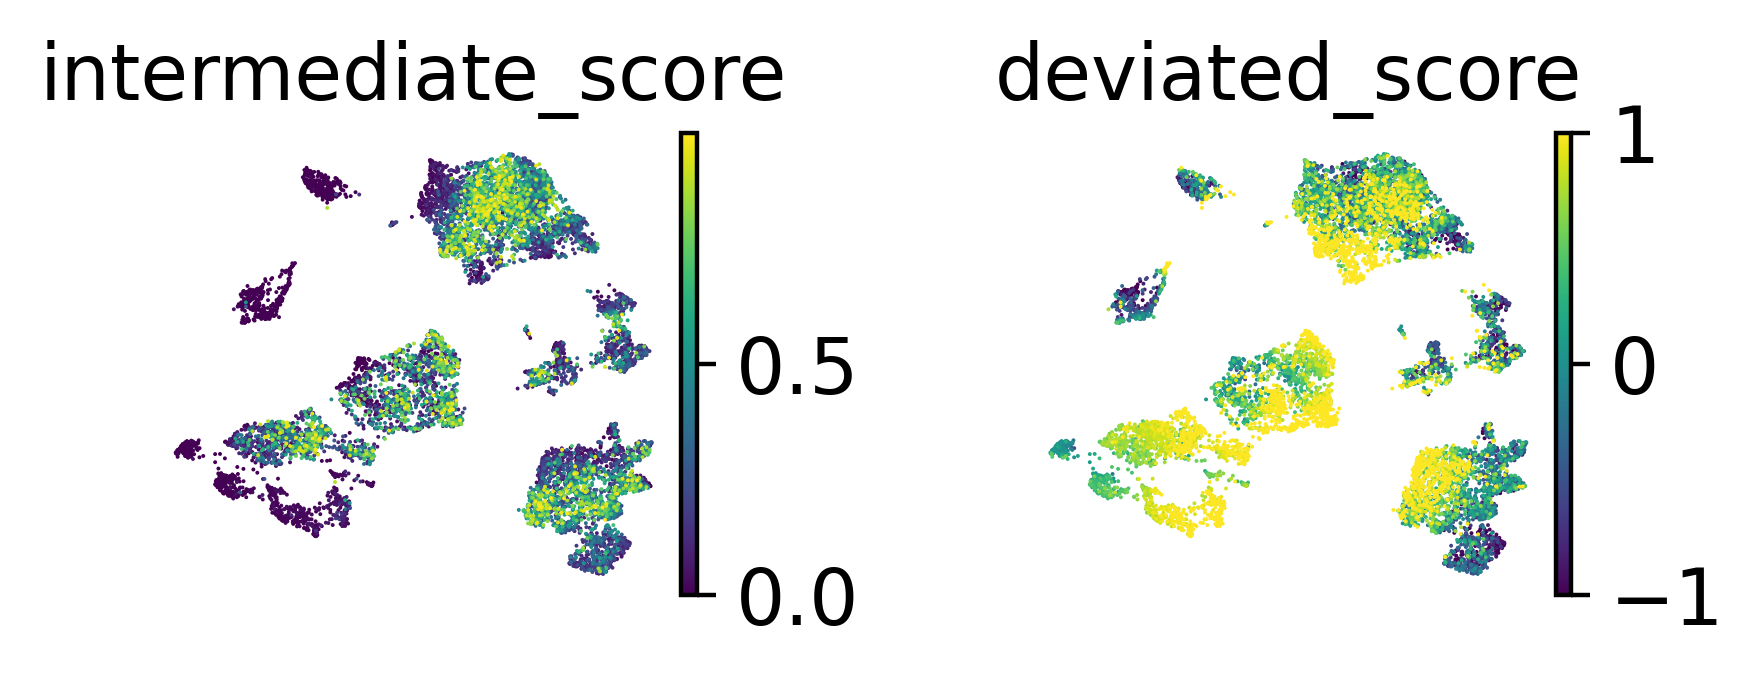

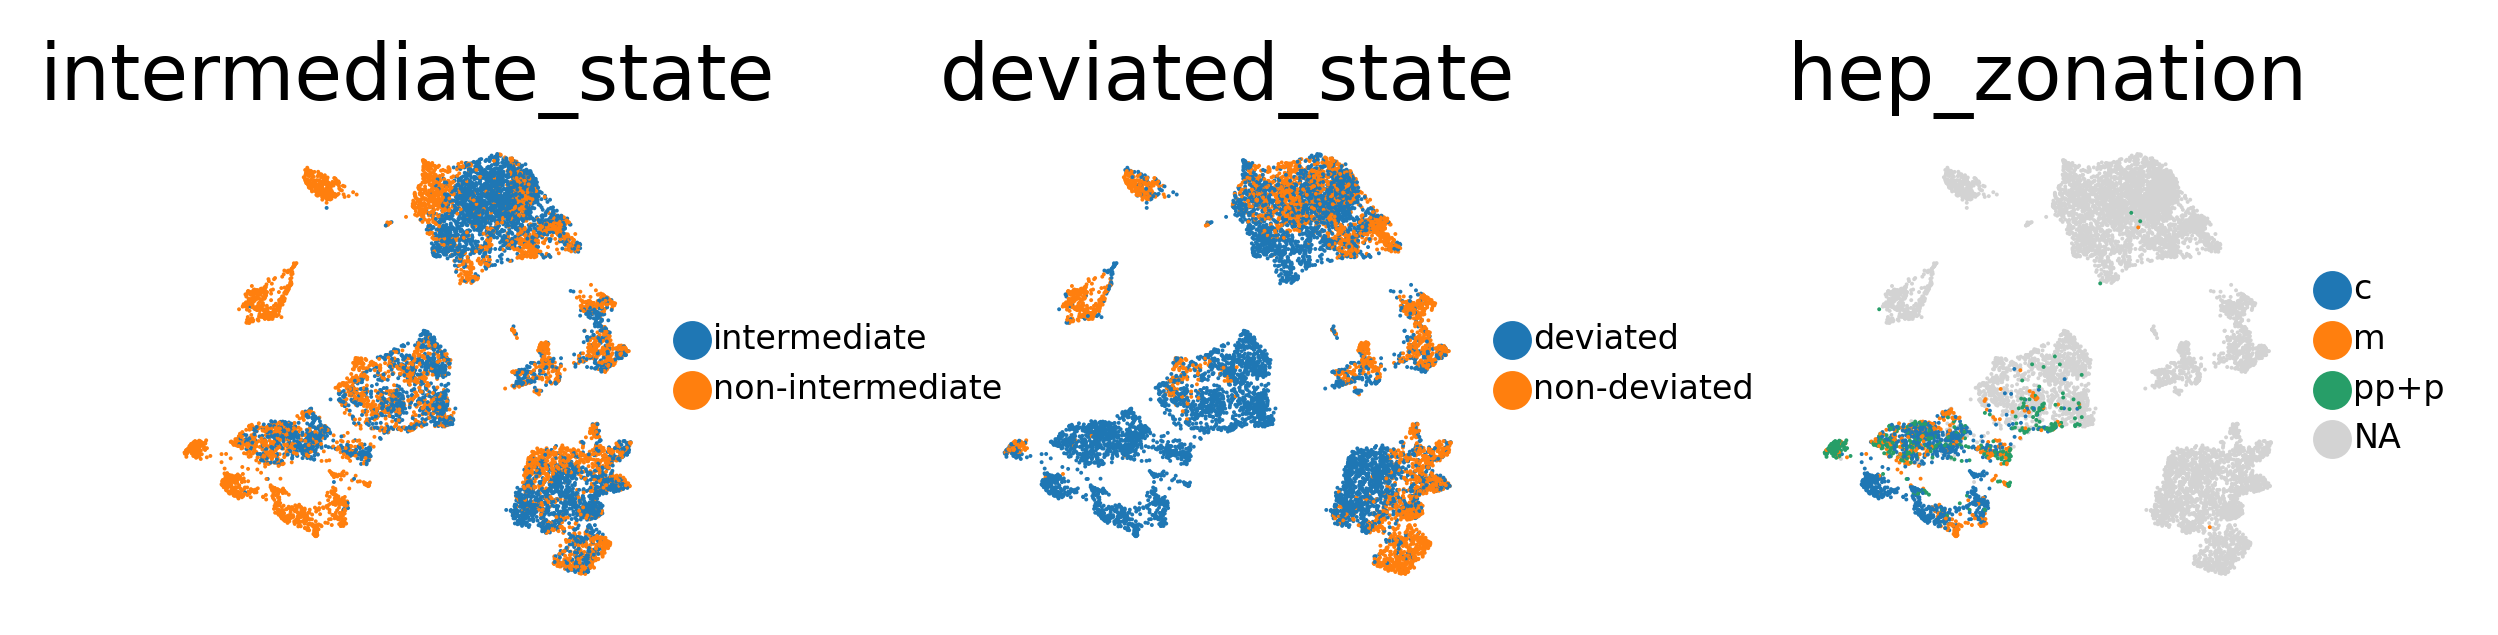

In [9]:
latent.obs = pd.concat([adata.obs, res], axis=1)
latent.obs['hep_zonation'] = None
latent.obs['hep_zonation'][hep.obs_names] = list(hep_res)

sc.pp.neighbors(latent, use_rep='X')
sc.tl.umap(latent)

sc.settings.set_figure_params(dpi=200, figsize=(2,2), frameon=False)
sc.pl.umap(latent, color=['pred_lv1', 'voting_lv2_1'], size=20000 / latent.n_obs, legend_fontsize=6)

sc.settings.set_figure_params(dpi=200, figsize=(1.5,1.5), frameon=False)
sc.pl.umap(latent, color=['intermediate_score', 'deviated_score'], size=20000 / latent.n_obs)
sc.pl.umap(latent, color=['intermediate_state', 'deviated_state', 'hep_zonation'], size=20000 / latent.n_obs, legend_fontsize=6)